# Market Basket Analysis with Python- Amazon

- Project overview:
  
  Amazon is a leading global e-commerce platform. With millions of customers making purchases across diverse categories, the leadership team wants to understand customer purchasing behavior, product affinities, and engagement trends to enhance personalized shopping experiences and optimize inventory and marketing strategies.


- Objective:

  Build a comprehensive Customer Purchasing Behavior and Product Recommendation Report using Python for data analysis. This report should clean and consolidate Amazon’s transaction and customer data, apply techniques such as Market Basket Analysis, clustering, and association rule mining, and provide actionable insights for personalized product recommendations, promotional strategies, and inventory optimization.


Video Presentation - https://drive.google.com/file/d/16zoJGLCqANbKGW74PcJWi216qjvEtmxp/view?usp=sharing 

#### Data Understanding

In [1]:
# Required library
import pandas as pd                                         # Pandas used for data loading, cleaning, and tabular data manipulation
import matplotlib.pyplot as plt                             # Matplotlib used for basic static data visualizations
import seaborn as sns                                       # Seaborn used for statistical and correlation-based visualizations
import plotly.express as px                                 # Plotly used for interactive and dashboard-style visualizations
from plotly.subplots import make_subplots                   # Used to create multiple plots in a single figure (side-by-side or grid layout)
import plotly.graph_objects as go                           # Used to build detailed and customizable Plotly charts
from sklearn.preprocessing import StandardScaler            # Used to standardize numerical features before clustering
from sklearn.cluster import KMeans                          # Used to perform customer clustering based on behavioral data

In [2]:
# Data Loading
df = pd.read_csv("Amazon.csv")
df.head()

Timestamp  age             Gender  \
0   2023/06/08 7:50:55 PM GMT+5:30   65  Prefer not to say   
1   2023/06/09 9:37:44 AM GMT+5:30   20               Male   
2  2023/06/11 11:26:54 PM GMT+5:30   42               Male   
3   2023/06/08 5:17:10 PM GMT+5:30   65             Others   
4  2023/06/11 10:59:30 PM GMT+5:30   45             Female   

       Purchase_Frequency                                Purchase_Categories  \
0  Less than once a month                               Clothing and Fashion   
1             Once a week  Groceries and Gourmet Food;Beauty and Personal...   
2             Once a week  Groceries and Gourmet Food;Beauty and Personal...   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4             Once a week  Beauty and Personal Care;Clothing and Fashion;...   

  Personalized_Recommendation_Frequency    Browsing_Frequency  \
0                                   Yes  Multiple times a day   
1                                    No                Rarely   
2                             Sometimes      Few times a week   
3                                    No     Few times a month   
4                             Sometimes     Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1                Filter                First page   
2               Keyword            Multiple pages   
3                Filter            Multiple pages   
4                   NaN                First page   

   Customer_Reviews_Importance  ... Review_Left Review_Reliability  \
0                            2  ...         Yes         Moderately   
1                            3  ...         Yes            Heavily   
2                            2  ...         Yes            Heavily   
3                            2  ...         Yes       Occasionally   
4                            5  ...         Yes             Rarely   

  Review_Helpfulness Personalized_Recommendation_Frequency   \
0                 No                                      2   
1                Yes                                      1   
2          Sometimes                                      5   
3                 No                                      3   
4                 No                                      2   

  Recommendation_Helpfulness Rating_Accuracy  Shopping_Satisfaction  \
0                  Sometimes                4                     4   
1                  Sometimes                4                     5   
2                         No                5                     3   
3                        Yes                1                     2   
4                        Yes                1                     2   

   Service_Appreciation                                  Improvement_Areas  \
0    Competitive prices    better app interface and lower shipping charges   
1        Quick delivery  Scrolling option would be much better than goi...   
2         All the above                                                Nil   
3        Quick delivery  Quality of product is very poor according to t...   
4        Quick delivery                     Irrelevant product suggestions   

   transaction  
0       778242  
1       193482  
2       925975  
3       566872  
4       683642  

[5 rows x 24 columns]

In [3]:
# Checking the shape of df
print("Df Shape: ",df.shape)

Df Shape:  (800, 24)


In [4]:
# Check the df columns names
print("Df Columns Name \n",df.columns)

Df Columns Name 
 Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction'],
      dtype='object')


In [5]:
# Checking more information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               800 non-null    object
 1   age                                     800 non-null    int64 
 2   Gender                                  800 non-null    object
 3   Purchase_Frequency                      800 non-null    object
 4   Purchase_Categories                     800 non-null    object
 5   Personalized_Recommendation_Frequency   800 non-null    object
 6   Browsing_Frequency                      800 non-null    object
 7   Product_Search_Method                   643 non-null    object
 8   Search_Result_Exploration               800 non-null    object
 9   Customer_Reviews_Importance             800 non-null    int64 
 10  Add_to_Cart_Browsing                    800 non-null    object
 11  Cart_C

In [6]:
# Checking the number of null values in each column
df.isnull().sum()

Timestamp                                   0
age                                         0
Gender                                      0
Purchase_Frequency                          0
Purchase_Categories                         0
Personalized_Recommendation_Frequency       0
Browsing_Frequency                          0
Product_Search_Method                     157
Search_Result_Exploration                   0
Customer_Reviews_Importance                 0
Add_to_Cart_Browsing                        0
Cart_Completion_Frequency                   0
Cart_Abandonment_Factors                    0
Saveforlater_Frequency                      0
Review_Left                                 0
Review_Reliability                          0
Review_Helpfulness                          0
Personalized_Recommendation_Frequency       0
Recommendation_Helpfulness                  0
Rating_Accuracy                             0
Shopping_Satisfaction                       0
Service_Appreciation              

In [7]:
# Summerized the df including object dtype columns
df.describe(include="all").T.head(20)

count unique  \
Timestamp                                 800    447   
age                                     800.0    NaN   
Gender                                    800      4   
Purchase_Frequency                        800      5   
Purchase_Categories                       800     29   
Personalized_Recommendation_Frequency     800      3   
Browsing_Frequency                        800      4   
Product_Search_Method                     643      4   
Search_Result_Exploration                 800      2   
Customer_Reviews_Importance             800.0    NaN   
Add_to_Cart_Browsing                      800      3   
Cart_Completion_Frequency                 800      5   
Cart_Abandonment_Factors                  800      4   
Saveforlater_Frequency                    800      5   
Review_Left                               800      2   
Review_Reliability                        800      5   
Review_Helpfulness                        800      3   
Personalized_Recommendation_Frequency   800.0    NaN   
Recommendation_Helpfulness                800      3   
Rating_Accuracy                         800.0    NaN   

                                                                   top freq  \
Timestamp                               2023/06/08 7:50:55 PM GMT+5:30    6   
age                                                                NaN  NaN   
Gender                                                            Male  209   
Purchase_Frequency                                        Once a month  168   
Purchase_Categories                        Clothing and Fashion;others   39   
Personalized_Recommendation_Frequency                              Yes  278   
Browsing_Frequency                                              Rarely  231   
Product_Search_Method                                          Keyword  170   
Search_Result_Exploration                               Multiple pages  406   
Customer_Reviews_Importance                                        NaN  NaN   
Add_to_Cart_Browsing                                                No  278   
Cart_Completion_Frequency                                       Always  172   
Cart_Abandonment_Factors                           High shipping costs  224   
Saveforlater_Frequency                                       Sometimes  174   
Review_Left                                                         No  407   
Review_Reliability                                             Heavily  167   
Review_Helpfulness                                                  No  289   
Personalized_Recommendation_Frequency                              NaN  NaN   
Recommendation_Helpfulness                                         Yes  270   
Rating_Accuracy                                                    NaN  NaN   

                                           mean        std  min   25%   50%  \
Timestamp                                   NaN        NaN  NaN   NaN   NaN   
age                                       35.17  18.916485  3.0  19.0  35.5   
Gender                                      NaN        NaN  NaN   NaN   NaN   
Purchase_Frequency                          NaN        NaN  NaN   NaN   NaN   
Purchase_Categories                         NaN        NaN  NaN   NaN   NaN   
Personalized_Recommendation_Frequency       NaN        NaN  NaN   NaN   NaN   
Browsing_Frequency                          NaN        NaN  NaN   NaN   NaN   
Product_Search_Method                       NaN        NaN  NaN   NaN   NaN   
Search_Result_Exploration                   NaN        NaN  NaN   NaN   NaN   
Customer_Reviews_Importance             3.05875   1.408111  1.0   2.0   3.0   
Add_to_Cart_Browsing                        NaN        NaN  NaN   NaN   NaN   
Cart_Completion_Frequency                   NaN        NaN  NaN   NaN   NaN   
Cart_Abandonment_Factors                    NaN        NaN  NaN   NaN   NaN   
Saveforlater_Frequency                      NaN        NaN  NaN   NaN   NaN   
Review_Left       

In [8]:
# Checking the data type of each column
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

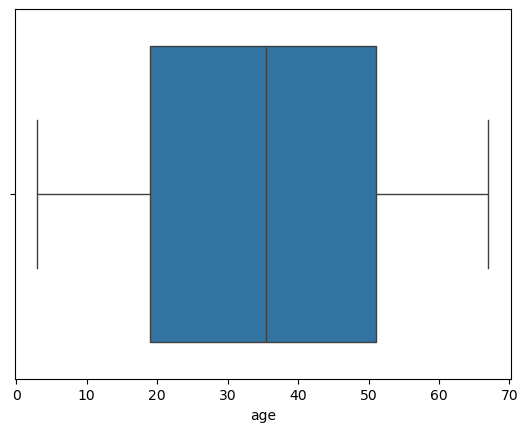

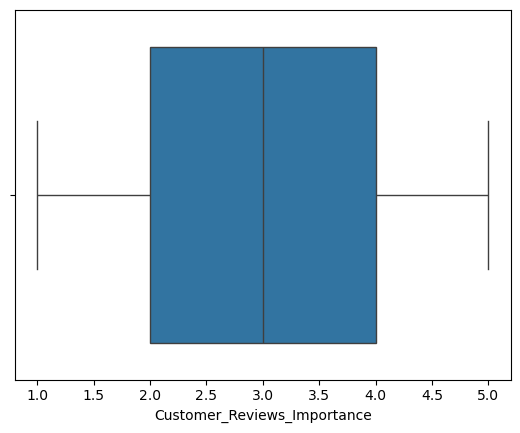

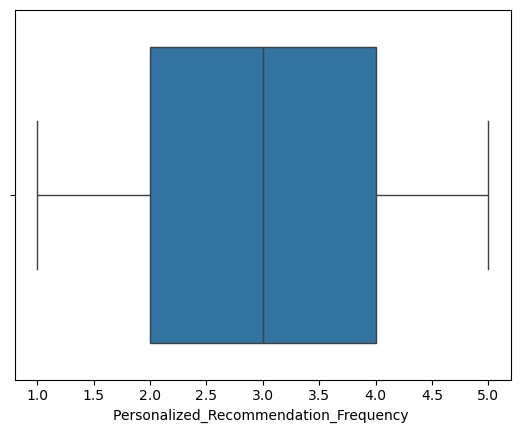

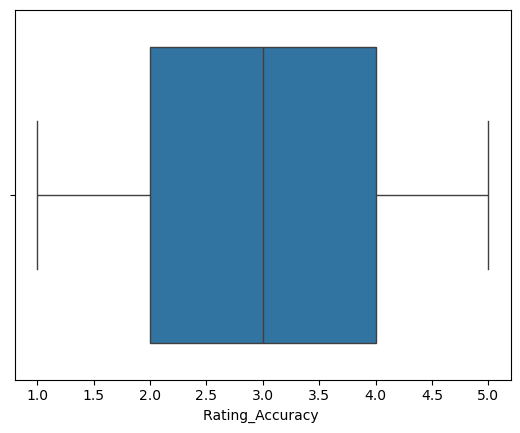

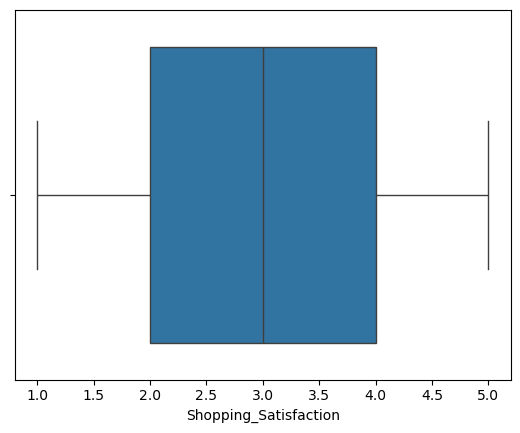

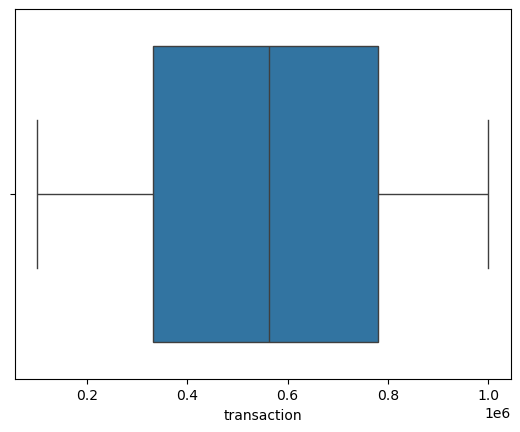

In [9]:
## creating box plot for checking outliers
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

### Task 1: Data Cleaning and Preparation

● Remove duplicate or inconsistent survey responses.

In [10]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

dupes = df.columns[df.columns.duplicated()]
print("Duplicated columns:", dupes)

Duplicated columns: Index(['Personalized_Recommendation_Frequency'], dtype='object')


In [11]:
# Identify and remove duplicated columns
df = df.loc[:, ~df.columns.duplicated()]
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction'],
      dtype='object')

In [12]:
# find duplicated names
dupes = df.duplicated().sum()
print("Duplicated columns:", dupes)

Duplicated columns: 0


● Standardize categorical entries (e.g., frequency levels, gender, recommendation responses).


In [13]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Once a month              168
Multiple times a week     159
Once a week               159
Few times a month         158
Less than once a month    156
Name: count, dtype: int64

In [14]:
df["Gender"].value_counts()

Gender
Male                 209
Others               202
Female               197
Prefer not to say    192
Name: count, dtype: int64

In [15]:
df['Personalized_Recommendation_Frequency'].value_counts()

Personalized_Recommendation_Frequency
Yes          278
No           272
Sometimes    250
Name: count, dtype: int64

In [16]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
Yes          270
Sometimes    268
No           262
Name: count, dtype: int64

● Handle missing values and inconsistent formats in Product_Search_Method and other
fields.


In [17]:
for i in df.columns:
    null_count = df[i].isnull().sum()
    if null_count > 0:
        print(f"Column '{i}' has {null_count} null values.")

Column 'Product_Search_Method' has 157 null values.


In [18]:
df["Product_Search_Method"].value_counts(dropna=False)

Product_Search_Method
Keyword       170
categories    163
Filter        161
NaN           157
others        149
Name: count, dtype: int64

In [19]:
# Identify missing values in Product_Search_Method
# Fill missing values using the most frequent category (mode)
df["Product_Search_Method"] = df["Product_Search_Method"].fillna(df["Product_Search_Method"].mode()[0])
print("Cloumn Product_Search_Method contain nullvalues is: ",df['Product_Search_Method'].isnull().sum())

Cloumn Product_Search_Method contain nullvalues is:  0


● Convert numerical rating columns (e.g., Customer_Reviews_Importance,
Shopping_Satisfaction) to appropriate numeric types for analysis.

In [20]:
# Convert rating-related columns to numeric type for analysis
rating_cols = [
    'Customer_Reviews_Importance',
    'Shopping_Satisfaction',
    'Rating_Accuracy'
]

for col in rating_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col])

df[rating_cols].dtypes


Customer_Reviews_Importance    int64
Shopping_Satisfaction          int64
Rating_Accuracy                int64
dtype: object

**Insights**

- Dataset is clean and consistent after handling duplicates and missing values.

- Rating columns are now suitable for statistical analysis and visualization.

---

### Task 2: Descriptive Behavior Analysis
● Summarize customer demographics (age, gender distribution).

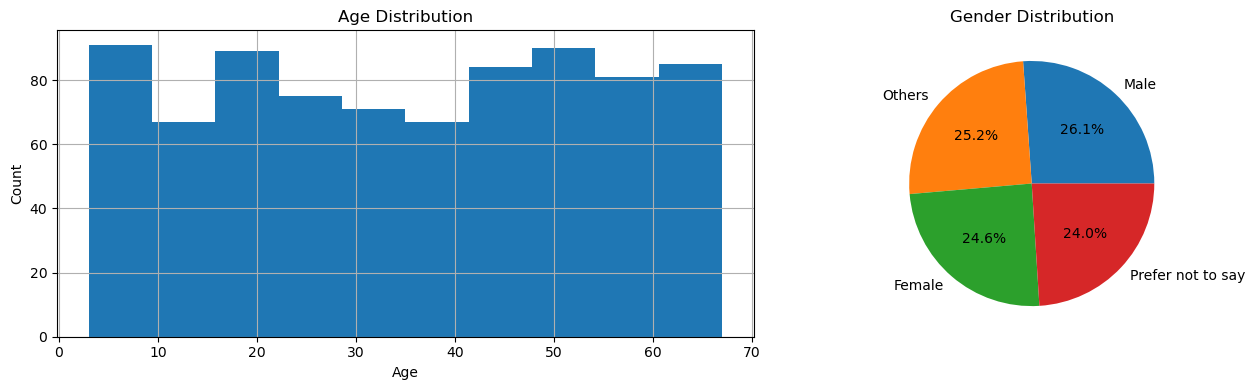

In [21]:
# Analyze age and gender distribution
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 4))


# Age distribution
ax1.hist(df["age"],bins=10)
ax1.set_title("Age Distribution")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.grid(True)

# Gender distribution
ax2.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index,  autopct='%1.1f%%')
ax2.set_title("Gender Distribution")
ax2.set_ylabel("")


plt.tight_layout()
plt.show()

● Analyze overall purchase frequency and most popular product categories.

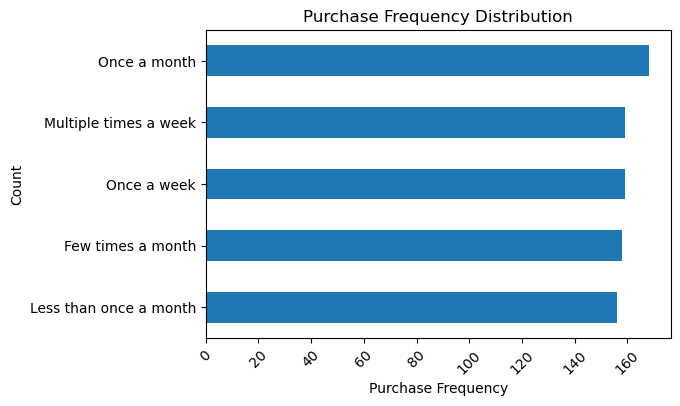

In [22]:
# Purchase Frequency
plt.figure(figsize=(6,4))
df['Purchase_Frequency'].value_counts().sort_values().plot(kind='barh')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Analyze product categories
# 1) Make a copy so original df is untouched
df_cat = df.copy()

# 2) Convert each row into a list of categories
df_cat['Category_List'] = df_cat['Purchase_Categories'].str.split(';').apply(
    lambda lst: [s.strip() for s in lst if s and s.strip() != '']
)

# 3) Explode to one-row-per-category
df_cat_exploded = df_cat.explode('Category_List')


# Quick sanity checks
print("Original rows:", len(df))
print("Exploded rows (one category per row):", len(df_cat_exploded))
print("Unique categories found:", df_cat_exploded['Category_List'].nunique())
print(df_cat_exploded['Category_List'].value_counts().head(15))

Original rows: 800
Exploded rows (one category per row): 2005
Unique categories found: 5
Category_List
Clothing and Fashion          450
others                        412
Home and Kitchen              391
Beauty and Personal Care      383
Groceries and Gourmet Food    369
Name: count, dtype: int64


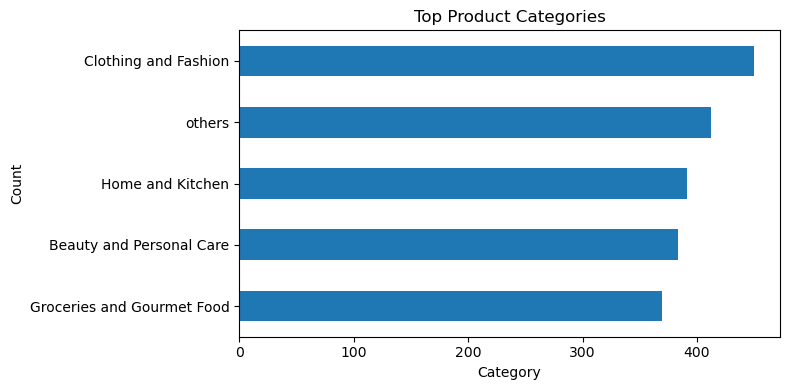

In [24]:
# Plot top categories
plt.figure(figsize=(8,4))
df_cat_exploded['Category_List'].value_counts().sort_values().plot(kind='barh')
plt.title("Top Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

● Identify top browsing methods and most common cart abandonment factors.

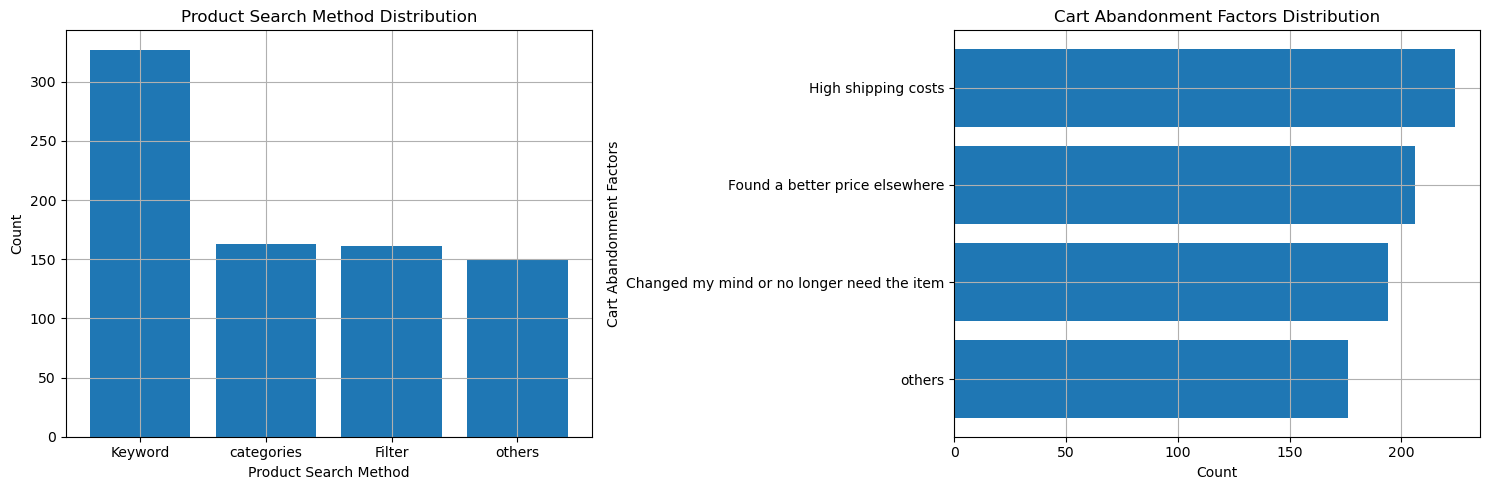

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))


# Top Browsing Methods
ax1.bar(df["Product_Search_Method"].value_counts().index,df["Product_Search_Method"].value_counts())
ax1.set_title("Product Search Method Distribution")
ax1.set_xlabel("Product Search Method")
ax1.set_ylabel("Count")
ax1.grid(True)

# Most Common Cart Abandonment Factors
ax2.barh(df["Cart_Abandonment_Factors"].value_counts().sort_values().index,df["Cart_Abandonment_Factors"].value_counts().sort_values())
ax2.set_title("Cart Abandonment Factors Distribution")
ax2.set_ylabel("Cart Abandonment Factors")
ax2.set_xlabel("Count")
ax2.grid(True)

plt.tight_layout()
plt.show()


● Calculate mean and median satisfaction, recommendation helpfulness, and rating
accuracy.

In [26]:
# Compute mean and median values for satisfaction and rating accuracy
metrics = ["Shopping_Satisfaction", "Rating_Accuracy"]
## Recommendation Helpfulness is a object dtype column so we unable to calculate mean and median of this column


for i in metrics:
    print(f"Column {i} :\n\t Mean Value = {df[i].mean():.2f} ; Median Value = {df[i].median():.2f}")

Column Shopping_Satisfaction :
	 Mean Value = 3.01 ; Median Value = 3.00
Column Rating_Accuracy :
	 Mean Value = 2.97 ; Median Value = 3.00


● Generate summary statistics and visualizations for key behavioral variables.

In [27]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Customer Gender Distribution",
        "Customer Purchase Frequency Distribution",
        "Top Product Categor",
        "Shopping Satisfaction Distribution"
    )
)

# Gender Distribution
# 1st row plot
fig.add_trace(
    go.Bar(
        x=df["Gender"].value_counts().index,
        y=df["Gender"].value_counts()
    ),
    row=1, col=1
)
fig.update_xaxes(title_text= "Gender", row=1,col=1)
fig.update_yaxes(title_text = "Count", row=1,col=1)

# Purchase Frequency Distribution
# 1st row plot
fig.add_trace(
    go.Bar(
        x = df["Purchase_Frequency"].value_counts().index,
        y = df["Purchase_Frequency"].value_counts()
    ),
    row = 1, col = 2
)
fig.update_xaxes(title_text= "Purchase_Frequency", row=1,col=2)
fig.update_yaxes(title_text = "Count", row=1,col=2)


# Top Product Category
# 2nd row plot
fig.add_trace(
    go.Bar(
        y = df_cat_exploded["Category_List"].value_counts().index,
        x = df_cat_exploded["Category_List"].value_counts(),
        orientation= "h"
    ),
    row = 2, col = 1
)
fig.update_yaxes(title_text= "Category_List", row=2,col=1)
fig.update_xaxes(title_text = "Count", row=2,col=1)


# Shopping Satisfaction Distribution (Histogram)
# 2nd rom plot
fig.add_trace(
    go.Histogram(
        x = df["Shopping_Satisfaction"],
        nbinsx=5
    ),
    row=2, col=2
)
fig.update_xaxes(title_text="Satisfaction Score (1–5)", row=2, col=2)
fig.update_yaxes(title_text="Number of Customers", row=2, col=2)


fig.update_layout(
    height=850,
    width=1300,
    title_text="Attractive Visualizations",
    showlegend=False
)

plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

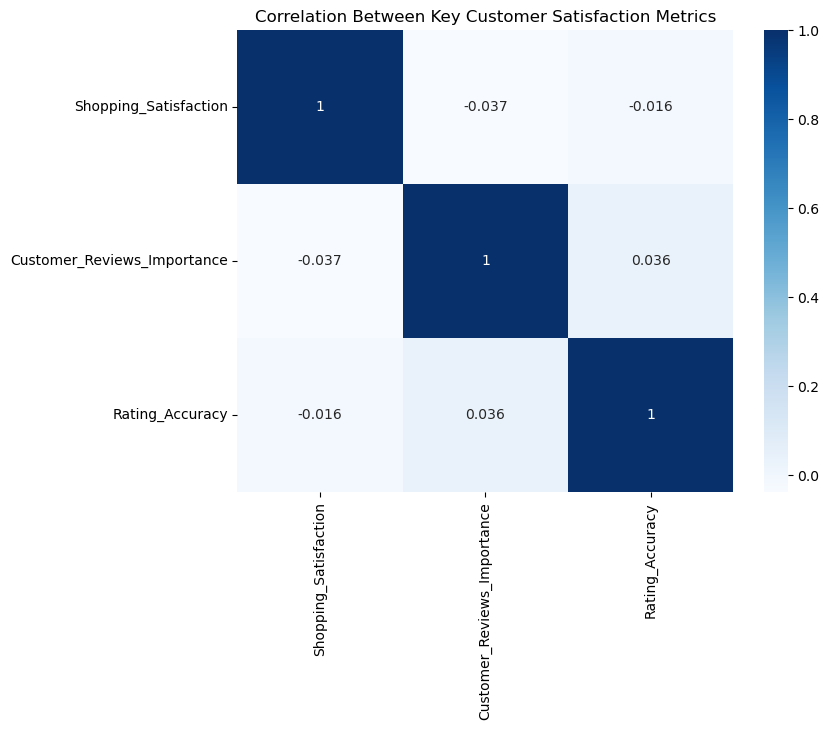

In [28]:
plt.figure(figsize=(8,6))
corr = df[['Shopping_Satisfaction','Customer_Reviews_Importance','Rating_Accuracy']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Between Key Customer Satisfaction Metrics")
plt.show()


**Insights**

- Customers show diverse purchase frequencies, with no single dominant group.

- Clothing & Fashion and Others are among the most purchased categories.

- Average shopping satisfaction and rating accuracy are around 3 (moderate level).

---

### Task 3: Customer Segmentation and Profiling
● Segment customers based on purchase frequency and shopping satisfaction levels.


In [29]:
# Convert purchase frequency and satisfaction into Low / Medium / High levels
satis_level =  {1 : "Low", 2 : "Low",
                3 : "Medium",
                4 : "High", 5 : "High"}
df["Shopping_Satisfaction_level"] = df["Shopping_Satisfaction"].map(satis_level)

df[["Shopping_Satisfaction","Shopping_Satisfaction_level"]].head()

Shopping_Satisfaction Shopping_Satisfaction_level
0                      4                        High
1                      5                        High
2                      3                      Medium
3                      2                         Low
4                      2                         Low

In [30]:
freq_level = {
    "Multiple times a week": "High",
    "Once a week": "High",
    "Few times a month": "Medium",
    "Once a month": "Low",
    "Less than once a month": "Low"
}

df['Purchase_Frequency_level'] = df['Purchase_Frequency'].map(freq_level)

df[['Purchase_Frequency', 'Purchase_Frequency_level']].head()


Purchase_Frequency Purchase_Frequency_level
0  Less than once a month                      Low
1             Once a week                     High
2             Once a week                     High
3            Once a month                      Low
4             Once a week                     High

In [31]:
df["Purchase_Frequency_level"].value_counts()

Purchase_Frequency_level
Low       324
High      318
Medium    158
Name: count, dtype: int64

In [32]:
df["Shopping_Satisfaction_level"].value_counts()

Shopping_Satisfaction_level
High      320
Low       320
Medium    160
Name: count, dtype: int64

In [33]:
# Create rule-based customer segments:
def segment_customer(row):
    freq = row['Purchase_Frequency_level']
    sat = row['Shopping_Satisfaction_level']

    if freq == "High" and sat == "High":
        return 'Frequent Buyers'
    elif freq == "Medium" and sat in ["Medium","High"]:
        return "Occasional Shoppers"
    else:
        return "At-Risk Customers"

df['Segment'] = df.apply(segment_customer, axis=1)

print(df['Segment'].value_counts())

Segment
At-Risk Customers      583
Frequent Buyers        135
Occasional Shoppers     82
Name: count, dtype: int64


● Create profiles such as:

  - Frequent Buyers: High purchase frequency, high satisfaction.
  - Occasional Shoppers: Medium frequency, moderate satisfaction.
  - At-Risk Customers: Low satisfaction or frequent cart abandonment.


In [34]:
# Profile segments using age, satisfaction, review importance, and rating accuracy
segment_profile = df.groupby('Segment').agg({
    'age': 'mean',
    'Shopping_Satisfaction': 'mean',
    'Customer_Reviews_Importance': 'mean',
    'Rating_Accuracy': 'mean'
}).round()

segment_profile.head()

age  Shopping_Satisfaction  Customer_Reviews_Importance  \
Segment                                                                         
At-Risk Customers    36.0                    3.0                          3.0   
Frequent Buyers      35.0                    5.0                          3.0   
Occasional Shoppers  33.0                    4.0                          3.0   

                     Rating_Accuracy  
Segment                               
At-Risk Customers                3.0  
Frequent Buyers                  3.0  
Occasional Shoppers              3.0

In [35]:
# Gender distribution
df.groupby('Segment')['Gender'].value_counts()


Segment              Gender           
At-Risk Customers    Male                 153
                     Others               146
                     Female               144
                     Prefer not to say    140
Frequent Buyers      Prefer not to say     39
                     Male                  35
                     Others                31
                     Female                30
Occasional Shoppers  Others                25
                     Female                23
                     Male                  21
                     Prefer not to say     13
Name: count, dtype: int64

In [36]:
# Product search method pattern
df.groupby('Segment')['Product_Search_Method'].value_counts()


Segment              Product_Search_Method
At-Risk Customers    Keyword                  237
                     Filter                   117
                     categories               117
                     others                   112
Frequent Buyers      Keyword                   53
                     categories                33
                     others                    26
                     Filter                    23
Occasional Shoppers  Keyword                   37
                     Filter                    21
                     categories                13
                     others                    11
Name: count, dtype: int64

In [37]:
# Browsing frequency differences
df.groupby('Segment')['Browsing_Frequency'].value_counts()


Segment              Browsing_Frequency  
At-Risk Customers    Rarely                  172
                     Few times a month       146
                     Multiple times a day    133
                     Few times a week        132
Frequent Buyers      Few times a month        37
                     Multiple times a day     33
                     Rarely                   33
                     Few times a week         32
Occasional Shoppers  Rarely                   26
                     Few times a week         22
                     Few times a month        17
                     Multiple times a day     17
Name: count, dtype: int64

In [38]:
df.groupby('Segment')['Cart_Abandonment_Factors'].value_counts()


Segment              Cart_Abandonment_Factors                  
At-Risk Customers    High shipping costs                           166
                     Found a better price elsewhere                144
                     Changed my mind or no longer need the item    143
                     others                                        130
Frequent Buyers      Found a better price elsewhere                 41
                     High shipping costs                            39
                     Changed my mind or no longer need the item     30
                     others                                         25
Occasional Shoppers  Changed my mind or no longer need the item     21
                     Found a better price elsewhere                 21
                     others                                         21
                     High shipping costs                            19
Name: count, dtype: int64

● Analyze demographic or behavioral differences across these segments

#### Demographic Differences Across Segments

In [39]:
# Age Differences
print("Age Differences Across Segments")
df.groupby('Segment')['age'].describe()

Age Differences Across Segments


count       mean        std  min    25%   50%    75%  \
Segment                                                                     
At-Risk Customers    583.0  35.662093  19.085467  3.0  19.50  36.0  52.00   
Frequent Buyers      135.0  34.607407  18.080292  3.0  19.50  35.0  50.50   
Occasional Shoppers   82.0  32.597561  19.045663  3.0  16.25  31.0  50.75   

                      max  
Segment                    
At-Risk Customers    67.0  
Frequent Buyers      66.0  
Occasional Shoppers  67.0

In [40]:
# Gender Differences
print("Gender Differences Across Segments")
df.groupby('Segment')['Gender'].value_counts()

Gender Differences Across Segments


Segment              Gender           
At-Risk Customers    Male                 153
                     Others               146
                     Female               144
                     Prefer not to say    140
Frequent Buyers      Prefer not to say     39
                     Male                  35
                     Others                31
                     Female                30
Occasional Shoppers  Others                25
                     Female                23
                     Male                  21
                     Prefer not to say     13
Name: count, dtype: int64

#### Behavioral Differences Across Segments

In [41]:
# Shopping Satisfaction Differences
df.groupby('Segment')['Shopping_Satisfaction'].mean().round()


Segment
At-Risk Customers      3.0
Frequent Buyers        5.0
Occasional Shoppers    4.0
Name: Shopping_Satisfaction, dtype: float64

In [42]:
# Browsing Frequency Differences
df.groupby('Segment')['Browsing_Frequency'].value_counts()


Segment              Browsing_Frequency  
At-Risk Customers    Rarely                  172
                     Few times a month       146
                     Multiple times a day    133
                     Few times a week        132
Frequent Buyers      Few times a month        37
                     Multiple times a day     33
                     Rarely                   33
                     Few times a week         32
Occasional Shoppers  Rarely                   26
                     Few times a week         22
                     Few times a month        17
                     Multiple times a day     17
Name: count, dtype: int64

In [43]:
# Product Search Method Differences
df.groupby('Segment')['Product_Search_Method'].value_counts()

Segment              Product_Search_Method
At-Risk Customers    Keyword                  237
                     Filter                   117
                     categories               117
                     others                   112
Frequent Buyers      Keyword                   53
                     categories                33
                     others                    26
                     Filter                    23
Occasional Shoppers  Keyword                   37
                     Filter                    21
                     categories                13
                     others                    11
Name: count, dtype: int64

**Insights**

-  At-Risk Customers form the largest segment and have lower satisfaction.

- Fequent Buyers show the highest satisfaction and stable shopping behavior.

- Segments differ in browsing habits, cart abandonment reasons, and search methods.

● Use clustering (e.g., K-Means) for behavioral grouping based on survey responses.

In [44]:
# Feature for clustring
features = ["Purchase_Frequency_num", "Shopping_Satisfaction_num"]

# Convert categorical behavior levels into numeric values
freq_map = {"Low": 1, "Medium": 2, "High": 3}
sat_map  = {"Low": 1, "Medium": 2, "High": 3}

df["Purchase_Frequency_num"] = df["Purchase_Frequency_level"].map(freq_map)
df["Shopping_Satisfaction_num"] = df["Shopping_Satisfaction_level"].map(sat_map)

# Standardize features
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
X_scaled.shape

(800, 2)

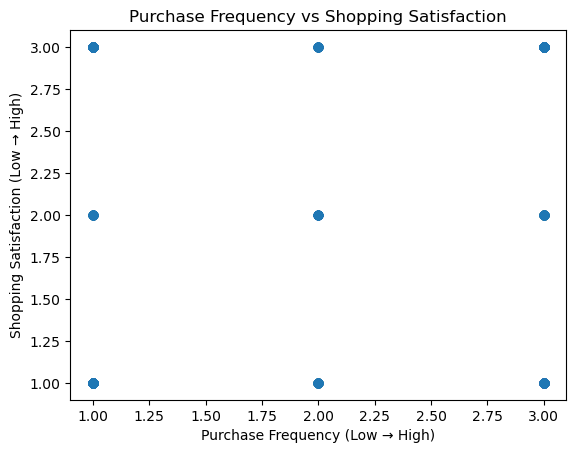

In [46]:
plt.scatter(df["Purchase_Frequency_num"], df["Shopping_Satisfaction_num"])
plt.xlabel("Purchase Frequency (Low → High)")
plt.ylabel("Shopping Satisfaction (Low → High)")
plt.title("Purchase Frequency vs Shopping Satisfaction")
plt.show()


In [47]:
# Apply K-Means clustering (k=3)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Harsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\Harsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Harsh\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Harsh\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [48]:
df['Cluster'].value_counts()


Cluster
1    352
0    259
2    189
Name: count, dtype: int64

In [49]:
df["Segment"].value_counts()

Segment
At-Risk Customers      583
Frequent Buyers        135
Occasional Shoppers     82
Name: count, dtype: int64

In [50]:
pd.crosstab(df['Segment'], df['Cluster'])


Cluster                0    1    2
Segment                           
At-Risk Customers     74  320  189
Frequent Buyers      135    0    0
Occasional Shoppers   50   32    0

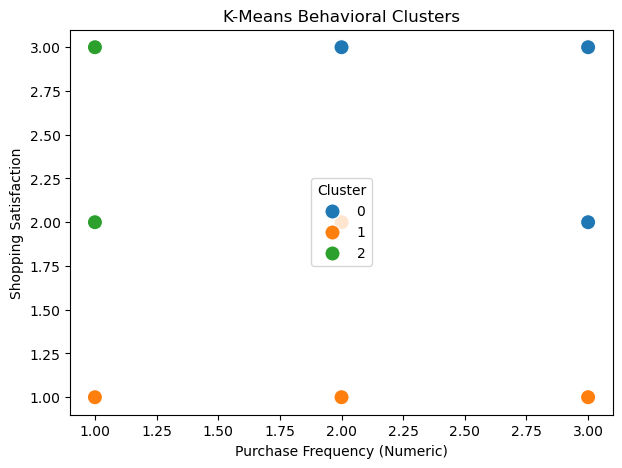

In [51]:
# Visualize clusters using scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Purchase_Frequency_num'],
    y=df['Shopping_Satisfaction_num'],
    hue=df['Cluster'],
    palette='tab10',
    s = 120
)
plt.title("K-Means Behavioral Clusters")
plt.xlabel("Purchase Frequency (Numeric)")
plt.ylabel("Shopping Satisfaction")
plt.show()


K-Means clustering was applied to behavioral survey variables, namely purchase frequency and shopping satisfaction, after converting categorical responses into ordinal numeric values. Three clusters were identified, representing distinct behavioral groups. The clustering results were compared with rule-based customer segments, showing strong alignment between frequent buyers, occasional shoppers, and at-risk customers. This validates the effectiveness of clustering for behavioral grouping.

**Insights**

- K-Means successfully groups customers into three behavioral clusters.

- Clusters align well with rule-based segments (Frequent, Occasional, At-Risk).

- Confirms that purchase frequency and satisfaction are strong behavioral indicators.

---

### Task 4: Recommendation and Review Insights
● Examine the relationship between recommendation helpfulness and shopping
satisfaction.

In [52]:
# Compare shopping satisfaction across recommendation helpfulness levels
df.groupby("Recommendation_Helpfulness")["Shopping_Satisfaction"].mean().round()


Recommendation_Helpfulness
No           3.0
Sometimes    3.0
Yes          3.0
Name: Shopping_Satisfaction, dtype: float64

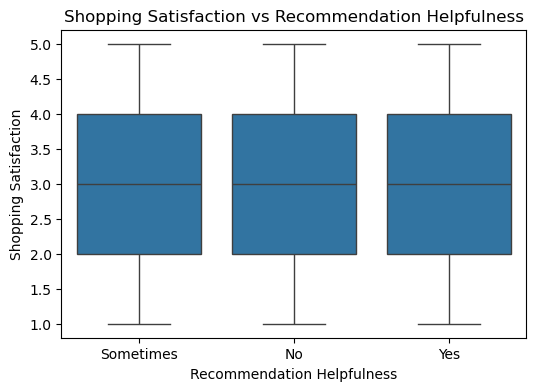

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="Recommendation_Helpfulness",
    y="Shopping_Satisfaction",
    data=df
)
plt.title("Shopping Satisfaction vs Recommendation Helpfulness")
plt.xlabel("Recommendation Helpfulness")
plt.ylabel("Shopping Satisfaction")
plt.show()

The analysis shows minimal variation in shopping satisfaction across different levels of recommendation helpfulness, indicating that recommendations alone do not significantly impact overall satisfaction.

● Evaluate how review reliability and helpfulness impact overall ratings.

In [54]:
# Analyze how review reliability impacts rating accuracy
df["Review_Reliability"].value_counts()

Review_Reliability
Heavily         167
Never           166
Occasionally    161
Moderately      156
Rarely          150
Name: count, dtype: int64

In [55]:
df.groupby("Review_Reliability")["Rating_Accuracy"].mean().round(2)

Review_Reliability
Heavily         3.02
Moderately      3.21
Never           2.84
Occasionally    2.86
Rarely          2.92
Name: Rating_Accuracy, dtype: float64

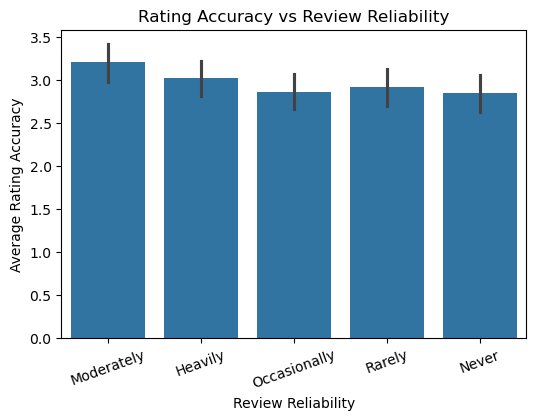

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="Review_Reliability",
    y="Rating_Accuracy",
    data=df,
    estimator="mean"
)
plt.title("Rating Accuracy vs Review Reliability")
plt.xlabel("Review Reliability")
plt.ylabel("Average Rating Accuracy")
plt.xticks(rotation=20)
plt.show()


Rating accuracy increases as reliance on reviews increases, particularly for customers who moderately or heavily trust reviews

**Insights**

- Shopping satisfaction remains almost the same regardless of recommendation helpfulness.

- Customers who trust reviews more report higher rating accuracy.

- Reviews influence perception more than recommendations.

---

● Identify trends in how often customers engage with or trust personalized
recommendations.

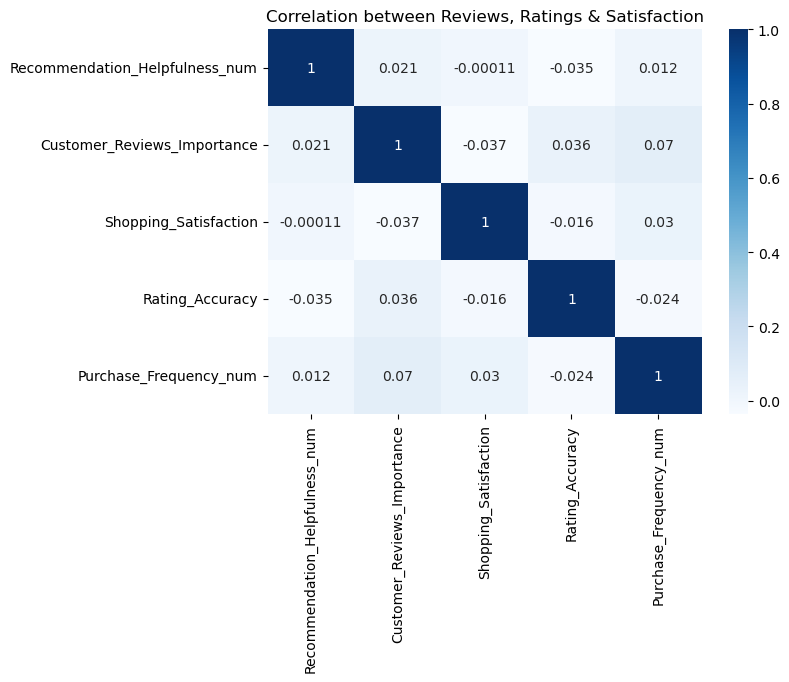

In [57]:
df["Recommendation_Helpfulness_num"] = df["Recommendation_Helpfulness"].map({
    "No": 0,
    "Sometimes": 1,
    "Yes": 2
})


corr_cols = [
    "Recommendation_Helpfulness_num",
    "Customer_Reviews_Importance",
    "Shopping_Satisfaction",
    "Rating_Accuracy",
    "Purchase_Frequency_num"
]

df[corr_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Correlation between Reviews, Ratings & Satisfaction")
plt.show()

Correlation analysis indicates weak relationships between Recommendation Helpfulness, review importance, satisfaction, rating accuracy,and purchase frequency, suggesting that customer behavior is influenced by multiple interacting factors rather than a single driver.

● Suggest actionable insights for improving Amazon’s recommendation system.

- Since shopping satisfaction remains similar regardless of recommendation helpfulness, Amazon should focus on improving recommendation relevance rather than increasing the number of recommendations.

- Customers who rely more on reviews perceive higher rating accuracy, so trusted and verified reviews should be integrated directly into recommendations.

- Weak correlations between recommendations, satisfaction, and purchase frequency suggest that Amazon should use a multi-factor recommendation strategy combining reviews, browsing history, and past purchases.

- Segment-based recommendations should be applied, offering personalized deals to frequent buyers and simplified recommendations to at-risk customers.

- Increasing transparency by explaining why a product is recommended can help build customer trust and engagement.

---

### Task 5: Visualization and Reporting

● Create attractive visualizations (bar charts, heatmaps, pie charts) for:
-  Purchase categories
-  Browsing frequency distribution
-  Satisfaction levels
-  Correlation between recommendation usefulness and satisfaction

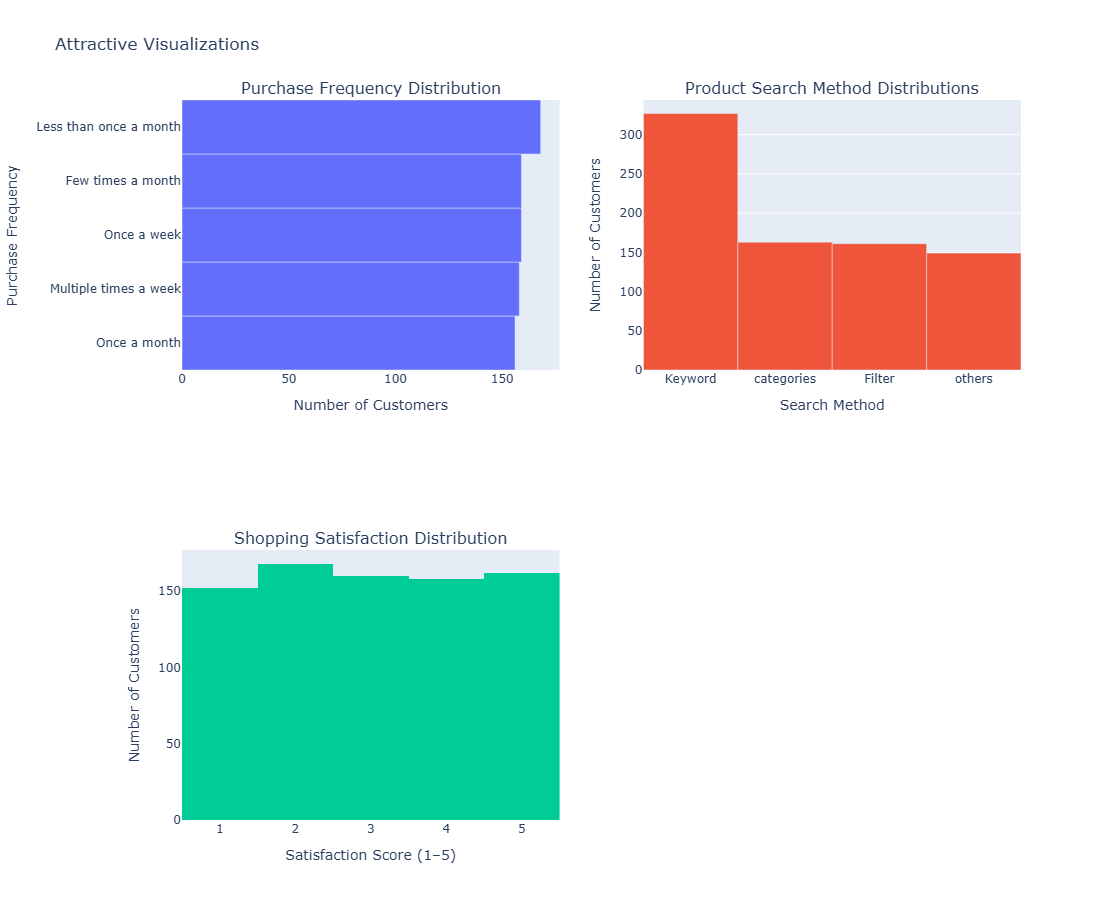

<Figure size 640x480 with 0 Axes>

In [58]:
# Visualize purchase frequency, search methods, satisfaction levels
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Purchase Frequency Distribution",
        "Product Search Method Distributions",
        "Shopping Satisfaction Distribution"
    )
)

# 1st row plot
fig.add_trace(
    go.Bar(
        y=df["Purchase_Frequency"].value_counts().index,
        x=df["Purchase_Frequency"].value_counts().sort_values(),
        orientation='h'
    ),
    row=1, col=1
)
fig.update_xaxes(title_text="Number of Customers", row=1, col=1)
fig.update_yaxes(title_text="Purchase Frequency", row=1, col=1)


# 1st row plot
fig.add_trace(
    go.Bar(
        x=df["Product_Search_Method"].value_counts().index,
        y=df["Product_Search_Method"].value_counts()
    ),
    row=1, col=2
)
fig.update_xaxes(title_text="Search Method", row=1, col=2)
fig.update_yaxes(title_text="Number of Customers", row=1, col=2)


# 2nd rom plot
fig.add_trace(
    go.Histogram(
        x = df["Shopping_Satisfaction"],
        nbinsx=5
    ),
    row=2, col=1
)
fig.update_xaxes(title_text="Satisfaction Score (1–5)", row=2, col=1)
fig.update_yaxes(title_text="Number of Customers", row=2, col=1)



fig.update_layout(
    height=900,
    width=1200,
    title_text="Attractive Visualizations",
    showlegend=False
)

plt.tight_layout()
fig.show()


Key Insights:

1. Purchase Frequency Distribution

- Customers are almost evenly distributed across all purchase frequency categories.
- No single purchase frequency (weekly, monthly, less frequent) clearly dominates.
- This indicates diverse shopping behavior rather than a strongly loyal or highly frequent customer base.
---
2. Product Search Method Distribution

- Keyword search is the most commonly used product search method.
- Category browsing, filters, and other methods are used less frequently but still by a significant number of customers.
- This shows customers prefer direct searching over exploratory browsing.
---
3. Shopping Satisfaction Distribution

- Shopping satisfaction scores are fairly evenly spread from 1 to 5.
- There is no strong skew toward very high satisfaction.
- This indicates moderate and mixed customer satisfaction, consistently high satisfaction.

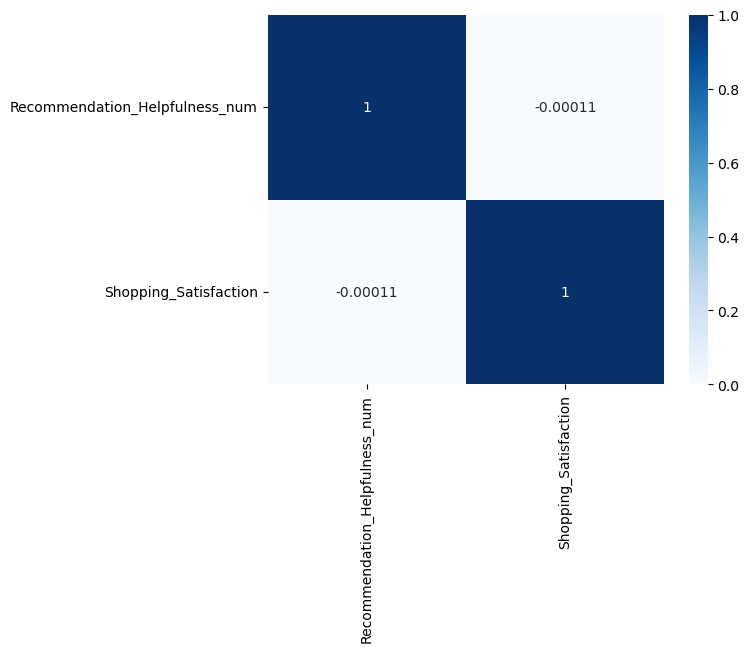

In [59]:
# Compute correlation between recommendation usefulness and satisfaction
### Convert Recommendation Usefulness to Numeric
rec_map = {
    "No": 0,
    "Sometimes": 1,
    "Yes": 2
}

df["Recommendation_Helpfulness_num"] = df["Recommendation_Helpfulness"].map(rec_map)

### Compute Correlation
corr = df[
    ["Recommendation_Helpfulness_num", "Shopping_Satisfaction"]
].corr()

sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

4. Recommendation Usefulness vs Shopping Satisfaction

- The correlation value between Recommendation Usefulness and Shopping Satisfaction is –0.00011, which is almost zero.
- This indicates no meaningful relationship between how useful customers find recommendations and their overall shopping satisfaction.
- This suggests that customer satisfaction is likely influenced by other factors such as pricing, delivery experience, product quality, or overall platform usability rather than recommendations alone.